# MNIST Digits Classification using Neural Networks



Mount your drive in order to run locally with colab

In [17]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


download & load the MNIST dataset.

*just run the next two cells and observe the outputs (shift&enter)

the training data set contains 60000 samples
each sample image from the training data set is a column-stacked grayscale image of 784 pixels
 this vectorized arrangement of the data is suitable for a Fully-Connected NN (as apposed to a Convolutional NN)
these column-stacked images can be reshaped to an image of (28, 28) pixels


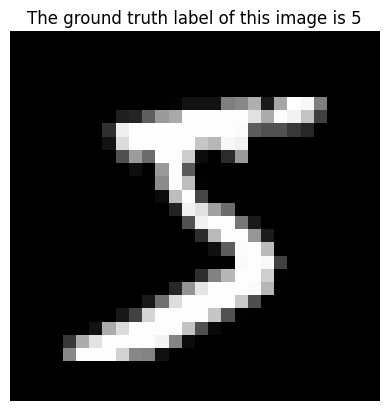

In [18]:

#importing modules that will be in use
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import gzip
import pickle
from PIL import Image
import random
import numpy as np

def _download(file_name):
    file_path = os.path.join(dataset_dir,file_name)

    if os.path.exists(file_path):
        return

    print("Downloading " + file_name + " ... ")
    urllib.request.urlretrieve(url_base + file_name, file_name)
    print("Done")

def download_mnist():
    for v in key_file.values():
       _download(v)

def _load_label(file_name):
    file_path =  os.path.join(dataset_dir, file_name)

    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
    print("Done")

    return labels

def _load_img(file_name):
    file_path = os.path.join(dataset_dir,file_name)

    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, img_size)
    print("Done")

    return data

def _convert_numpy():
    dataset = {}
    dataset['train_img'] =  _load_img(key_file['train_img'])
    dataset['train_label'] = _load_label(key_file['train_label'])
    dataset['test_img'] = _load_img(key_file['test_img'])
    dataset['test_label'] = _load_label(key_file['test_label'])

    return dataset

def init_mnist():
    download_mnist()
    dataset = _convert_numpy()
    print("Creating pickle file ...")
    with open(save_file, 'wb') as f:
        pickle.dump(dataset, f, -1)
    print("Done")

def _change_one_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1

    return T

def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """
    Parameters
    ----------
    normalize : Normalize the pixel values
    flatten : Flatten the images as one array
    one_hot_label : Encode the labels as a one-hot array

    Returns
    -------
    (Trainig Image, Training Label), (Test Image, Test Label)
    """
    if not os.path.exists(save_file):
        init_mnist()

    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)

    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0

    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label'])


# Load the MNIST dataset
url_base = 'http://yann.lecun.com/exdb/mnist/'
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

dataset_dir = '/content'
save_file = dataset_dir + "/mnist.pkl"

train_num = 60000
test_num = 10000
img_dim = (1, 28, 28)
img_size = 784

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True)


# printing data shape

print('the training data set contains '+ str(x_train.shape[0]) + ' samples')

img = x_train[0]
label = t_train[0]

img = img.reshape(28, 28)
print('each sample image from the training data set is a column-stacked grayscale image of '+ str(x_train.shape[1]) +' pixels'
      + '\n this vectorized arrangement of the data is suitable for a Fully-Connected NN (as apposed to a Convolutional NN)' )
print('these column-stacked images can be reshaped to an image of ' +str(img.shape)+ ' pixels')

# printing a sample from the dataset

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('The ground truth label of this image is '+str(label))
plt.show()

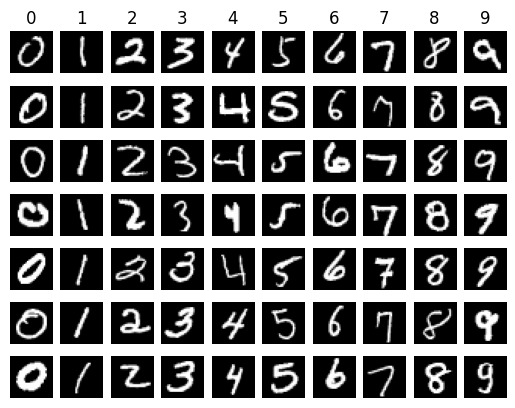

In [19]:
# Visualize some examples from the dataset.
# We'll show a few examples of training images from each class.
num_classes = 10
samples_per_class = 7
for cls in range(num_classes):
    idxs = np.argwhere(t_train==cls)
    sample = np.random.choice(idxs.shape[0], samples_per_class, replace=False) # randomly picks 7 from the appearences
    idxs=idxs[sample]

    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + cls + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        img = x_train[idx].reshape(28, 28)

        plt.imshow(img, cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

**QUESTION 1**:What are vanishing gradients? Name one known activation function that has this problem and one that does not.

**ANSWER**:

Vanishing Gradients, is when gradients in deep neural networks become very small during training. This leads to the weights not being updated effectively during the training process, causing slow or stalled learning.

Sigmoid is an activation function prone to vanishing gradients due to its saturating behavior.

ReLU is an activation function less prone to vanishing gradients for positive inputs, aiding in efficient learning in deep networks.








here we will implement the sigmoid activation function and it's gradient

In [20]:

def sigmoid(x):
    #############################################################################
    #                             YOUR CODE                                     #
    #############################################################################
    sig = 1/(1+ np.exp(-x))
    ############################################################################
    #                             END OF YOUR CODE                             #
    ############################################################################
    return sig
def sigmoid_grad(x):
    #############################################################################
    #                             YOUR CODE                                     #
    #############################################################################
    sig_grad = sigmoid(x)*(1 - sigmoid(x))

    ############################################################################
    #                             END OF YOUR CODE                             #
    ############################################################################
    return sig_grad


Implement a fully-vectorized loss function for the Softmax classifier
Make sure the softmax is stable.
To make our softmax function numerically stable,we simply normalize the values in the vector,
by multiplying the numerator and denominator with a constant C.
We can choose an arbitrary value for log(C) term, but generally log(C)=−max(a) is chosen, as it shifts all of elements in the vector to negative to zero, and negatives with large exponents saturate to zero rather than the infinity.

In [21]:
def softmax(x):

    """
  Softmax loss function, should be implemented in a vectorized fashion (without loops)


  Inputs:
  - X: A numpy array of shape (N, C) containing a minibatch of data.
  Returns:
  - probabilities: A numpy array of shape (N, C) containing the softmax probabilities.

  if you are not careful here, it is easy to run into numeric instability
     """
    #############################################################################
    #                             YOUR CODE                                     #
    #############################################################################
    exp_x = np.exp(x - np.max(x, axis = 1, keepdims = True)) # The subtraction of the maximum value is done to improve numerical stability, preventing overflow issues when exponentiating large numbers.
    probabilities = exp_x / np.sum(exp_x, axis = 1, keepdims = True)
    ############################################################################
    #                             END OF YOUR CODE                             #
    ############################################################################
    return probabilities

def cross_entropy_error(y, t):
    """
    Inputs:

    - t:  A numpy array of shape (N,C) containing  a minibatch of training labels, it is a one-hot array,
      with t[GT]=1 and t=0 elsewhere, where GT is the ground truth label ;
    - y: A numpy array of shape (N, C) containing the softmax probabilities (the NN's output).

    Returns a tuple of:
    - loss as single float (do not forget to divide by the number of samples in the minibatch (N))
    """
    #############################################################################
    #                             YOUR CODE                                     #
    #############################################################################
    # Compute loss

    batch_size = y.shape[0]
    error = -np.sum(t * np.log(y + 1e-10)) / batch_size  # Adding a small constant to avoid log(0) issues

    ############################################################################
    #                             END OF YOUR CODE                             #
    ############################################################################
    return error

We will design and train a two-layer fully-connected neural network with sigmoid nonlinearity and
softmax cross entropy loss. We assume an input dimension of D=784, a hidden dimension of H, and perform classification over C classes.

The architecture should be fullyconnected -> sigmoid -> fullyconnected -> softmax.

The learnable parameters of the model are stored in the dictionary,
'params', that maps parameter names to numpy arrays.

In the next cell we will initialize the weights and biases, design the fully connected(fc) forward and backward functions that will be in use for the training (using SGD).



In [22]:
def TwoLayerNet( input_size, hidden_size, output_size, weight_init_std=0.01):
    ############################################################################
    # TODO: Initialize the weights and biases of the two-layer net. Weights    #
    # should be initialized from a Gaussian with standard deviation equal to   #
    # weight_init_std, and biases should be initialized to zero. All weights and  #
    # biases should be stored in the dictionary 'params', with first layer  #
    # weights and biases using the keys 'W1' and 'b1' and second layer weights #
    # and biases using the keys 'W2' and 'b2'.                                 #
    ############################################################################
    params = {}
    params["W1"] = np.random.normal(0,weight_init_std, size = (input_size, hidden_size))
    params["b1"] = np.zeros(hidden_size)
    params["W2"] = np.random.normal(0,weight_init_std, size = (hidden_size, output_size))
    params["b2"] = np.zeros(output_size)
    ############################################################################
    #                             END OF YOUR CODE                             #
    ############################################################################
    return params


def FC_forward(x, w, b):
    """
    Computes the forward pass for a fully-connected layer.
    The input x has shape (N, D) and contains a minibatch of N
    examples, where each example x[i] has shape D and will be transformed to an output vector of dimension M.
    Inputs:
    - x: A numpy array containing input data, of shape (N, D)
    - w: A numpy array of weights, of shape (D, M)
    - b: A numpy array of biases, of shape (M,)

    Returns a tuple of:
    - out: output result of the forward pass, of shape (N, M)
    - cache: (x, w, b)
    """
    #############################################################################
    #                             YOUR CODE                                     #
    #############################################################################
    out = np.matmul(x, w) + b
    #############################################################################
    #                             END OF YOUR CODE                              #
    #############################################################################
    cache = (x, w, b)
    return out, cache



def FC_backward(dout, cache):
    """
    Computes the backward pass for a fully-connected layer.
    Inputs:
    - dout: Upstream derivative, of shape (N, M)
    - cache: Tuple of:
    - w: Weights, of shape (D, M)
    Returns a tuple of:
    - dx: Gradient with respect to x, of shape (N, D)
    - dw: Gradient with respect to w, of shape (D, M)
    - db: Gradient with respect to b, of shape (M,)
    """
    x, w, b = cache
    dx, dw, db = None, None, None

    #############################################################################
    #                             YOUR CODE                                     #
    #############################################################################
    dx = np.matmul(dout, w.T)
    dw = np.matmul(x.T, dout)
    db = np.sum(dout, axis=0)
    #############################################################################
    #                             END OF YOUR CODE                              #
    #############################################################################
    return dx, dw, db

Here we will design the entire model, which outputs the NN's probabilities and gradients.


In [23]:
def Model(params, x, t):
    """
    Computes the backward pass for a fully-connected layer.
    Inputs:
    - params:  dictionary with first layer weights and biases using the keys 'W1' and 'b1' and second layer weights
    and biases using the keys 'W2' and 'b2'. each with dimensions corresponding its input and output dimensions.
    - x: Input data, of shape (N,D)
    - t:  A numpy array of shape (N,C) containing training labels, it is a one-hot array,
      with t[GT]=1 and t=0 elsewhere, where GT is the ground truth label ;
    Returns:
    - y: the output probabilities for the minibatch (at the end of the forward pass) of shape (N,C)
    - grads: dictionary containing gradients of the loss with respect to W1, W2, b1, b2.

    note: use the FC_forward ,FC_backward functions.

    """
    W1, W2 = params['W1'], params['W2']
    b1, b2 = params['b1'], params['b2']
    grads = {'W1': None ,'W2': None, 'b1': None ,'b2': None }

    batch_num = x.shape[0]

    #############################################################################
    #                             YOUR CODE                                     #
    #############################################################################
    # forward (fullyconnected -> sigmoid -> fullyconnected -> softmax).
    out1, cache1 = FC_forward(x,W1,b1)
    out2, cache2 = FC_forward(sigmoid(out1),W2,b2)
    y = softmax(out2)


    # backward - calculate gradients.
    dout2 = y - t
    dx2, dw2, db2 = FC_backward(dout2, cache2)

    dout1 = np.dot(dout2, W2.T) * sigmoid_grad(out1)
    dx1, dw1, db1 = FC_backward(dout1, cache1)

    grads = {'dW1': dw1, 'dW2': dw2, 'db1': db1, 'db2': db2}
    #############################################################################
    #                             END OF YOUR CODE                              #
    #############################################################################

    return grads, y

Compute the accuracy of the NNs predictions.


In [24]:
def accuracy(y,t):
    """
    Computes the accuracy of the NN's predictions.
    Inputs:
    - t:  A numpy array of shape (N,C) containing training labels, it is a one-hot array,
      with t[GT]=1 and t=0 elsewhere, where GT is the ground truth label ;
    - y: the output probabilities for the minibatch (at the end of the forward pass) of shape (N,C)
    Returns:
    - accuracy: a single float of the average accuracy.
    """
    #############################################################################
    #                             YOUR CODE                                     #
    #############################################################################

    predicted_labels = np.argmax(y, axis=1)

    true_labels = np.argmax(t, axis=1)

    correct_predictions = np.sum(predicted_labels == true_labels)
    total_samples = t.shape[0]

    accuracy = correct_predictions / total_samples

    #############################################################################
    #                             END OF YOUR CODE                              #
    #############################################################################
    return accuracy



Trianing the model:
To train our network we will use minibatch SGD.  
*Note that the test dataset is actually used as the validation dataset in the training

training of 60 epochs, each epoch will have 59 iterations
train acc: 0.418% |  test acc: 0.7932% |  loss for epoch 0: 1.739933904305181
train acc: 0.831% |  test acc: 0.8867% |  loss for epoch 1: 0.5857930108761452
train acc: 0.890% |  test acc: 0.9045% |  loss for epoch 2: 0.3952598556271178
train acc: 0.902% |  test acc: 0.9126% |  loss for epoch 3: 0.3410554823704582
train acc: 0.909% |  test acc: 0.9139% |  loss for epoch 4: 0.316901807603959
train acc: 0.912% |  test acc: 0.9193% |  loss for epoch 5: 0.29703702207726984
train acc: 0.918% |  test acc: 0.924% |  loss for epoch 6: 0.2791863505744378
train acc: 0.923% |  test acc: 0.9263% |  loss for epoch 7: 0.2685736187814834
train acc: 0.926% |  test acc: 0.9291% |  loss for epoch 8: 0.25427590725724064
train acc: 0.929% |  test acc: 0.9321% |  loss for epoch 9: 0.24452695360058738
train acc: 0.932% |  test acc: 0.9347% |  loss for epoch 10: 0.2332290910182891
train acc: 0.935% |  test acc: 0.9365% |  loss for epoch 11: 0.222584839

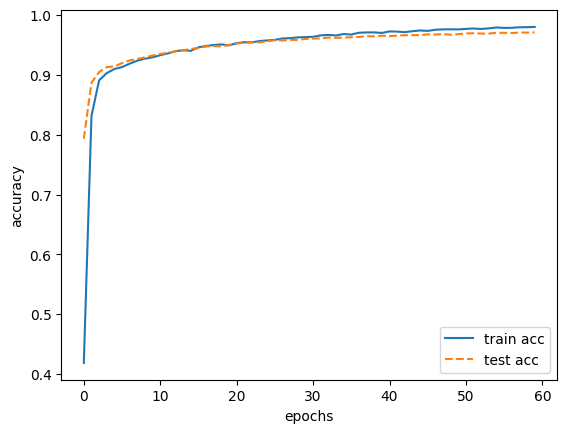

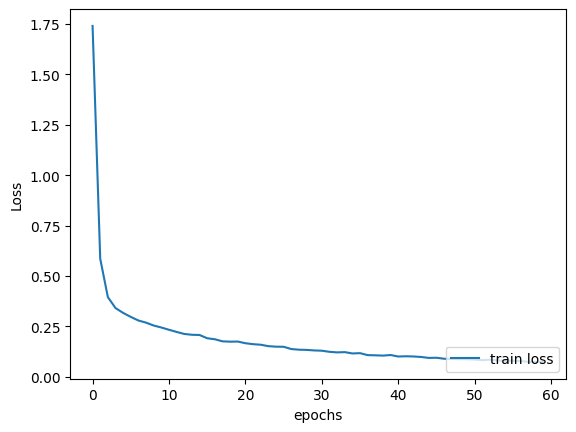

In [25]:
# You should be able to receive at least 97% accuracy, choose hyperparameters accordingly.
epochs = 60
mini_batch_size = 1024
learning_rate = 0.001
num_hidden_cells = 128

def Train(epochs_num, batch_size, lr, H):
    #  Dividing a dataset into training data and test data

    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
    C=10
    D=x_train.shape[1]
    network_params = TwoLayerNet(input_size=D, hidden_size=H, output_size=C) #hidden_size is the only hyperparameter here

    train_size = x_train.shape[0]
    train_loss_list = []
    train_acc_list = []
    test_acc_list = []
    iter_per_epoch = round(train_size / batch_size)

    print('training of ' + str(epochs_num) +' epochs, each epoch will have '+ str(iter_per_epoch)+ ' iterations')
    for i in range(epochs_num):

        train_loss_iter= []
        train_acc_iter= []

        for k in range(iter_per_epoch):


            #############################################################################
            #                             YOUR CODE                                     #
            #############################################################################
            # 1. Select part of training data (mini-batch) randomly
            mask = np.random.choice(train_size, batch_size, replace=False)
            x_batch = x_train[mask]
            t_batch = t_train[mask]

            # 2. Calculate the predictions and the gradients to reduce the value of the loss function
            grads, y_batch = Model(network_params, x_batch, t_batch)

            # 3. Update weights and biases with the gradients
            for key in network_params.keys():
              if key.startswith('W'):
                  network_params[key] -= lr * grads['d' + key]
              elif key.startswith('b'):
                  network_params[key] -= lr * grads['d' + key]


            #############################################################################
            #                             END OF YOUR CODE                              #
            #############################################################################

            # Calculate the loss and accuracy for visalizaton

            error=cross_entropy_error(y_batch, t_batch)
            train_loss_iter.append(error)
            acc_iter=accuracy(y_batch, t_batch)
            train_acc_iter.append(acc_iter)
            if k == iter_per_epoch-1:
                train_acc = np.mean(train_acc_iter)
                train_acc_list.append(train_acc)
                train_loss_list.append(np.mean(train_loss_iter))

                _, y_test = Model(network_params, x_test, t_test)
                test_acc = accuracy(y_test, t_test)
                test_acc_list.append(test_acc)
                print("train acc: " + str(train_acc)[:5] + "% |  test acc: "   + str(test_acc) + "% |  loss for epoch " + str(i) +": "+ str(np.mean(train_loss_iter)))
    return train_acc_list, test_acc_list, train_loss_list, network_params

train_acc, test_acc, train_loss, net_params = Train(epochs, mini_batch_size, learning_rate, num_hidden_cells)

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc))
plt.plot(x, train_acc, label='train acc')
plt.plot(x, test_acc, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(loc='lower right')
plt.show()


markers = {'train': 'o'}
x = np.arange(len(train_loss))
plt.plot(x, train_loss, label='train loss')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(loc='lower right')
plt.show()


# You should be able to receive at least 97% accuracy, choose hyperparameters accordingly.


**QUESTION 2:** Explain the results looking at the visualizations above, base your answer on the hyperparameters.

**ANSWER:**

The provided output shows the training and test accuracy, as well as the loss for each epoch during training. Let's analyze the results based on the hyperparameters:

- **Epochs (Training Iterations):** The model is trained for 60 epochs, and each epoch consists of 59 iterations.

- **Mini-Batch Size:** The mini-batch size used is 1024.

- **Learning Rate:** The learning rate is set to 0.001.

- **Number of Hidden Cells (Hidden Layer Size):** The neural network has 128 hidden cells in the hidden layer.

**Observations:**

1. **Training Accuracy:** The training accuracy starts from around 43.2% in the first epoch and steadily increases over subsequent epochs. It reaches 98% by the end of training, indicating that the model is learning from the training data.

2. **Test Accuracy:** The test accuracy also increases over epochs and reaches around 97.1% by the end of training. The increasing test accuracy suggests that the model generalizes well to unseen data.

3. **Loss:** The loss decreases consistently over epochs, indicating that the model is improving in minimizing the cross-entropy loss on the training data.

4. **Overfitting:** The training accuracy is higher than the test accuracy, but the gap is not too large. This suggests that the model is generalizing reasonably well and does not show severe signs of overfitting.

**Conclusion:**
- The chosen hyperparameters seem to result in effective training, with both training and test accuracies improving over the course of training.
- The learning rate, mini-batch size, and hidden layer size seem to be chosen appropriately for this task.
- Further hyperparameter tuning or experimentation with different architectures could potentially lead to even better results.





**QUESTION** 3: Suggest a way to improve the results by changing the networks's architecture  

**ANSWER**:

To potentially improve the results, we can experiment with the following changes to the network's architecture:

Add More Hidden Layers:

Introduce additional hidden layers to the network. This can enable the model to learn hierarchical representations of the data. For instance, you can add one or more hidden layers with increasing sizes.

Dropout Regularization:

Apply dropout regularization to the hidden layers during training. Dropout can prevent overfitting by randomly dropping out a proportion of neurons during each training iteration.

Different Activation Functions:

Try using different activation functions in the hidden layers. ReLU is a common choice, but variations like Leaky ReLU or Parametric ReLU might offer improvements.

Optimizer Choice:

Experiment with different optimizers (Adam, RMSprop, or SGD with momentum) to see if one performs better than the others.

Data Augmentation:

Apply data augmentation techniques to the training set. This can artificially increase the size of your dataset and help the model generalize better.

(784, 128)


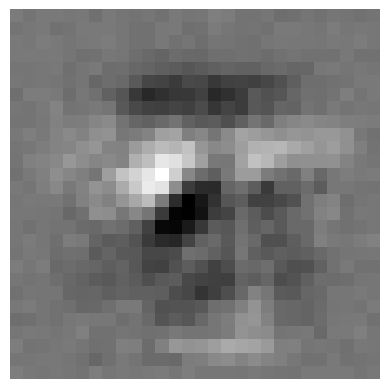

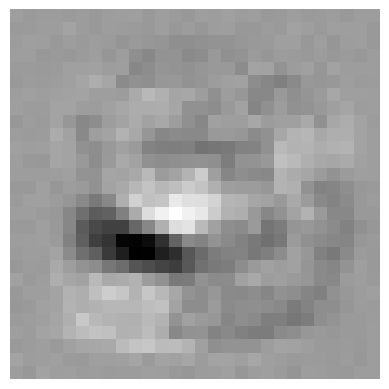

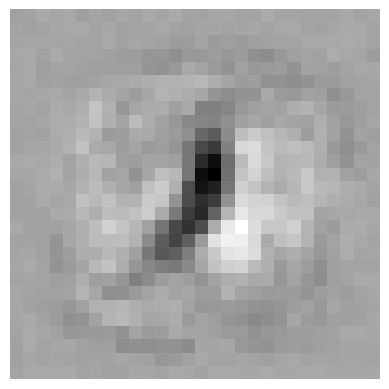

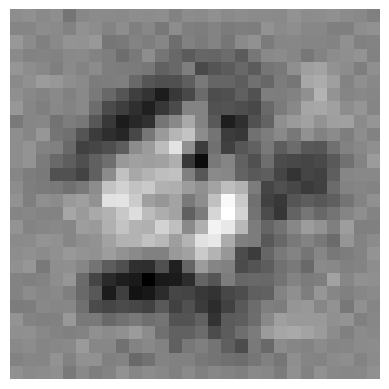

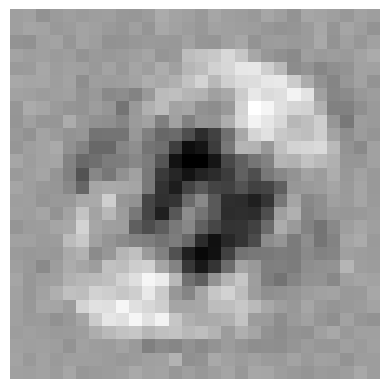

In [26]:
# Visualize some weights. features of digits should be somehow present.
def show_net_weights(params):
    W1 = params['W1']
    print(W1.shape)
    for i in range(5):
        W = W1[:,i*5].reshape(28, 28)
        plt.imshow(W,cmap='gray')
        plt.axis('off')
        plt.show()

show_net_weights(net_params)


Implement, train and test the same two-layer network, using a **deep learning library** (pytorch/tensorflow/keras).

As before, you should be able to receive at least 97% accuracy.

Please note, that in this section you will need to implement the model, the training and the testing by yourself (you may use the code in earlier sections)
Don't forget to print the accuracy during training (in the same format as before).

For installing a deep learning library, you should use "!pip3 install..." (lookup the compatible syntex for your library)

# MY CODE

Training on GPU.


Epoch 1/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 1/60, Loss: 2.078693259741373, Accuracy: 40.23%


Epoch 2/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 2/60, Loss: 1.8003850208964325, Accuracy: 71.185%


Epoch 3/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 3/60, Loss: 1.6770114465612145, Accuracy: 82.315%


Epoch 4/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 4/60, Loss: 1.6474023419301866, Accuracy: 83.6%


Epoch 5/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 5/60, Loss: 1.6003105574759884, Accuracy: 89.63833333333334%


Epoch 6/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 6/60, Loss: 1.57740774811178, Accuracy: 90.845%


Epoch 7/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 7/60, Loss: 1.5669147962533334, Accuracy: 91.40666666666667%


Epoch 8/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 8/60, Loss: 1.5598050450357261, Accuracy: 91.84%


Epoch 9/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 9/60, Loss: 1.5543581130999873, Accuracy: 92.25666666666666%


Epoch 10/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 10/60, Loss: 1.5502034522485042, Accuracy: 92.56666666666666%


Epoch 11/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 11/60, Loss: 1.5465439456672485, Accuracy: 92.79%


Epoch 12/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 12/60, Loss: 1.5433769561242365, Accuracy: 93.04166666666667%


Epoch 13/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 13/60, Loss: 1.5403717626120157, Accuracy: 93.32%


Epoch 14/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 14/60, Loss: 1.5378761285745004, Accuracy: 93.495%


Epoch 15/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 15/60, Loss: 1.5355713112918652, Accuracy: 93.67666666666666%


Epoch 16/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 16/60, Loss: 1.5333010341810143, Accuracy: 93.875%


Epoch 17/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 17/60, Loss: 1.5313703050935903, Accuracy: 94.045%


Epoch 18/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 18/60, Loss: 1.5294979097762547, Accuracy: 94.21166666666667%


Epoch 19/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 19/60, Loss: 1.5277080408041028, Accuracy: 94.365%


Epoch 20/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 20/60, Loss: 1.5260190441988517, Accuracy: 94.52%


Epoch 21/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 21/60, Loss: 1.5244866088968545, Accuracy: 94.635%


Epoch 22/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 22/60, Loss: 1.5229798029010422, Accuracy: 94.78333333333333%


Epoch 23/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 23/60, Loss: 1.521647236427823, Accuracy: 94.88333333333334%


Epoch 24/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 24/60, Loss: 1.5203652125049905, Accuracy: 95.01833333333333%


Epoch 25/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 25/60, Loss: 1.5191903614191617, Accuracy: 95.125%


Epoch 26/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 26/60, Loss: 1.5179720232452172, Accuracy: 95.24%


Epoch 27/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 27/60, Loss: 1.5168771059616752, Accuracy: 95.305%


Epoch 28/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 28/60, Loss: 1.515809092659881, Accuracy: 95.44333333333333%


Epoch 29/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 29/60, Loss: 1.5148357914265802, Accuracy: 95.49166666666666%


Epoch 30/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 30/60, Loss: 1.513918185694782, Accuracy: 95.56833333333333%


Epoch 31/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 31/60, Loss: 1.5129747246774499, Accuracy: 95.63833333333334%


Epoch 32/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 32/60, Loss: 1.5121518965504597, Accuracy: 95.72%


Epoch 33/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 33/60, Loss: 1.5112341270354634, Accuracy: 95.78166666666667%


Epoch 34/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 34/60, Loss: 1.5103802336586847, Accuracy: 95.89333333333333%


Epoch 35/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 35/60, Loss: 1.5096614342380836, Accuracy: 95.94666666666667%


Epoch 36/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 36/60, Loss: 1.5088636110370286, Accuracy: 95.99%


Epoch 37/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 37/60, Loss: 1.5081666611242985, Accuracy: 96.07666666666667%


Epoch 38/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 38/60, Loss: 1.5074257141150138, Accuracy: 96.16833333333334%


Epoch 39/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 39/60, Loss: 1.506759120185594, Accuracy: 96.195%


Epoch 40/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 40/60, Loss: 1.5060676064468237, Accuracy: 96.27166666666666%


Epoch 41/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 41/60, Loss: 1.5054368605360318, Accuracy: 96.30166666666666%


Epoch 42/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 42/60, Loss: 1.5047721217795846, Accuracy: 96.41333333333333%


Epoch 43/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 43/60, Loss: 1.5040893065180756, Accuracy: 96.45%


Epoch 44/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 44/60, Loss: 1.503465499854894, Accuracy: 96.515%


Epoch 45/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 45/60, Loss: 1.50292389024283, Accuracy: 96.54666666666667%


Epoch 46/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 46/60, Loss: 1.502423764311749, Accuracy: 96.57833333333333%


Epoch 47/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 47/60, Loss: 1.50179328860868, Accuracy: 96.68833333333333%


Epoch 48/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 48/60, Loss: 1.5012381536373194, Accuracy: 96.69166666666666%


Epoch 49/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 49/60, Loss: 1.5007242580542817, Accuracy: 96.72666666666667%


Epoch 50/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 50/60, Loss: 1.5002722668762944, Accuracy: 96.79%


Epoch 51/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 51/60, Loss: 1.499660228876676, Accuracy: 96.86%


Epoch 52/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 52/60, Loss: 1.49906821815288, Accuracy: 96.91666666666667%


Epoch 53/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 53/60, Loss: 1.498663577941305, Accuracy: 96.955%


Epoch 54/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 54/60, Loss: 1.4981930539227915, Accuracy: 96.99666666666667%


Epoch 55/60:   0%|          | 0/1035 [00:00<?, ?it/s]

Epoch 55/60, Loss: 1.497764365684583, Accuracy: 97.04666666666667%
Target accuracy of 97% reached. Stopping training.
Test Accuracy: 96.32%


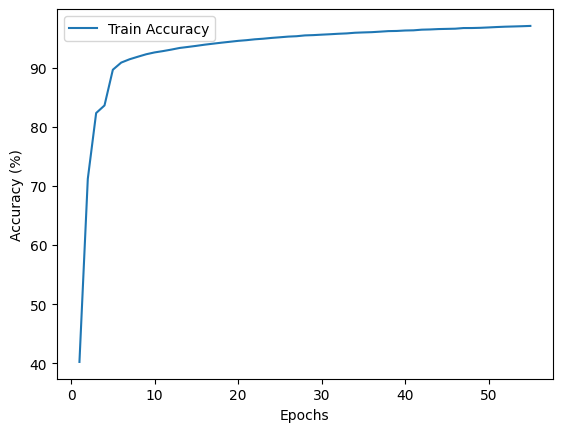

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

# check if GPU is available
train_on_gpu = torch.cuda.is_available()

if train_on_gpu:
    print('Training on GPU.')
else:
    print('No GPU available, training on CPU.')

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
train_data = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(train_data, batch_size=58, shuffle=True)

# Download and load the test data
test_data = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(test_data, batch_size=58, shuffle=True)

# Define the two-layer neural network model
class TwoLayerNet(nn.Module):
    def __init__(self):
        super(TwoLayerNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)  # Output size is 10 (for 10 classes)

    def forward(self, x):
        x = x.view(x.shape[0], -1)  # Flatten the input images
        x = F.sigmoid(self.fc1(x))  # Apply sigmoid activation function
        x = F.softmax(self.fc2(x), dim=1)  # Apply softmax activation function
        return x

# Create an instance of the model
model = TwoLayerNet()

# Move the model to GPU if available
if train_on_gpu:
    model.cuda()

# Define the optimizer and the loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Set up learning rate scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.1, patience=3, verbose=True)

# Training loop
def train(model, train_loader, optimizer, criterion, scheduler, target_accuracy=97, max_epochs=60):
    train_accuracy = []

    for epoch in range(1, max_epochs + 1):
        model.train()

        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in tqdm(train_loader, desc=f'Epoch {epoch}/{max_epochs}'):
            if train_on_gpu:
                images, labels = images.cuda(), labels.cuda()

            optimizer.zero_grad()

            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_accuracy = 100 * correct / total
        train_accuracy.append(epoch_accuracy)

        print(f'Epoch {epoch}/{max_epochs}, Loss: {running_loss / len(train_loader)}, Accuracy: {epoch_accuracy}%')

        # Check if the target accuracy is reached
        if epoch_accuracy >= target_accuracy:
            print(f'Target accuracy of {target_accuracy}% reached. Stopping training.')
            break

        # Step the scheduler with the new accuracy
        scheduler.step(epoch_accuracy)

    return train_accuracy

# Testing loop
def test(model, test_loader):
    model.eval()

    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            if train_on_gpu:
                images, labels = images.cuda(), labels.cuda()

            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_accuracy = 100 * correct / total
    print(f'Test Accuracy: {test_accuracy}%')

# Train the model until it reaches 97% accuracy
train_accuracy = train(model, trainloader, optimizer, criterion, scheduler, target_accuracy=97, max_epochs=60)

# Test the model
test(model, testloader)

# Plot training accuracy
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()